In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [3]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

In [4]:
df = pd.read_csv("C:/Users/LENOVO X1 YOGA/Downloads/heart_failure_clinical_records_dataset.csv")

In [5]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.shape

(299, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Data cleaning and Visualization

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
# univariate analysis
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [13]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [14]:
def categoric_summary(df):
    columns = ["Categories","Uniques", "All Count","Value Count", "Percent Count"]
    summary = pd.DataFrame(data = None, columns = columns)
    df.dropna(inplace = True)
    for i in df:
        for j in df[i].unique():
            summary = summary.append(pd.DataFrame([[str(i) + " (" + str(df[i].nunique()) + ")",
                                                    j,
                                                    df[i].count(),
                                                    df[i].value_counts()[j],
                                                    str(round(100 * df[i].value_counts()[j]/df[i].count(),2)) +" %"]],
                                                  columns = columns))
    return summary.set_index(["Categories","Uniques"])


In [15]:
categoric_summary(df[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']])

All Count Value Count Percent Count
Categories              Uniques                                    
anaemia (2)             0             299         170       56.86 %
                        1             299         129       43.14 %
diabetes (2)            0             299         174       58.19 %
                        1             299         125       41.81 %
high_blood_pressure (2) 1             299         105       35.12 %
                        0             299         194       64.88 %
sex (2)                 1             299         194       64.88 %
                        0             299         105       35.12 %
smoking (2)             0             299         203       67.89 %
                        1             299          96       32.11 %
DEATH_EVENT (2)         1             299          96       32.11 %
                        0             299         203       67.89 %

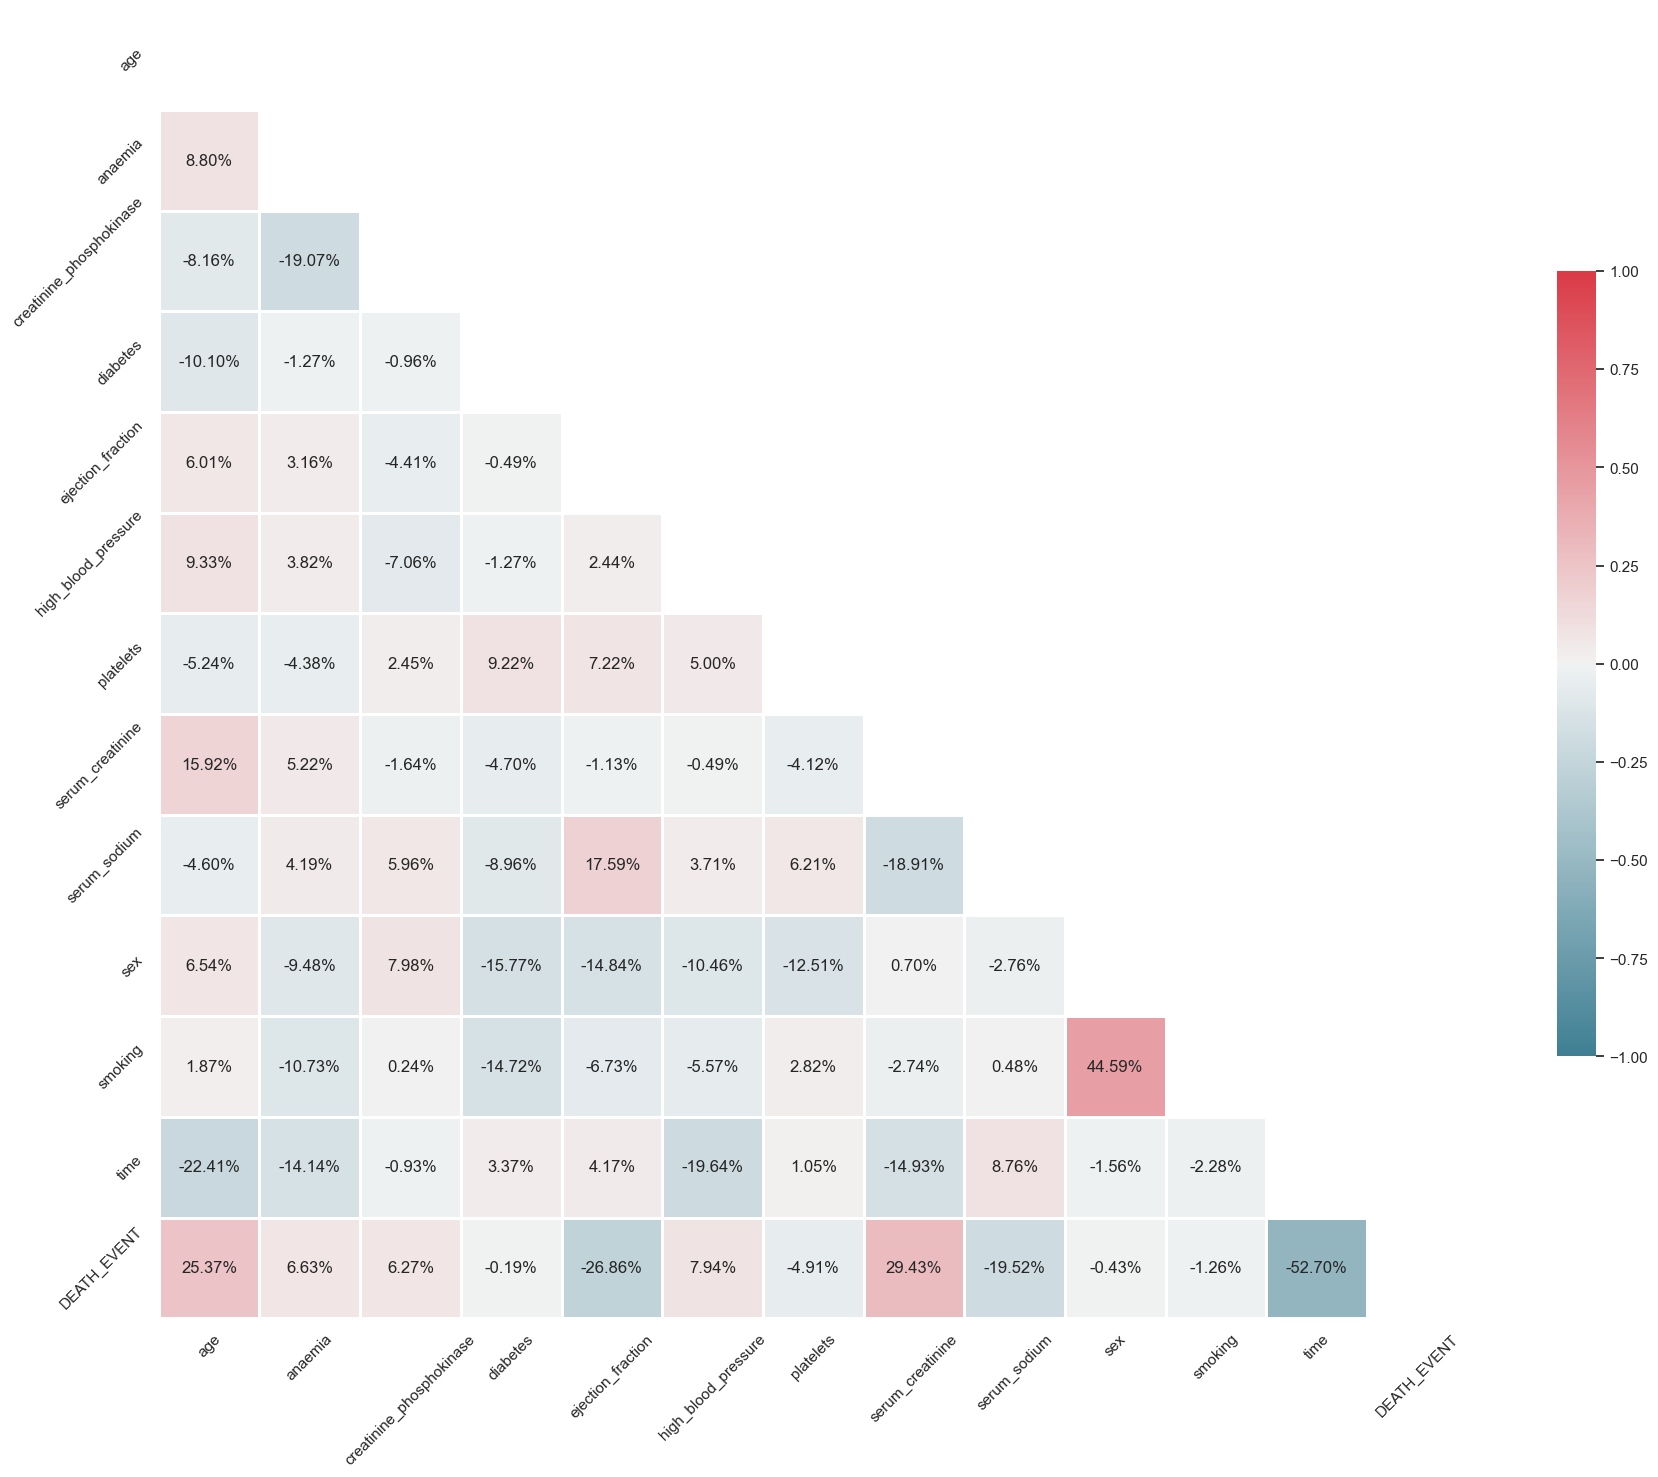

In [16]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(len(corr.columns)+10, len(corr.columns)+4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask,fmt = ".2%",cmap=cmap,vmax=1,vmin=-1,center=0,square=True,linewidths=1,cbar_kws={"shrink": .6})
plt.xticks(rotation=45)
plt.yticks(rotation=45);


In [17]:
corr = df.corr()

<AxesSubplot:xlabel='count', ylabel='DEATH_EVENT'>

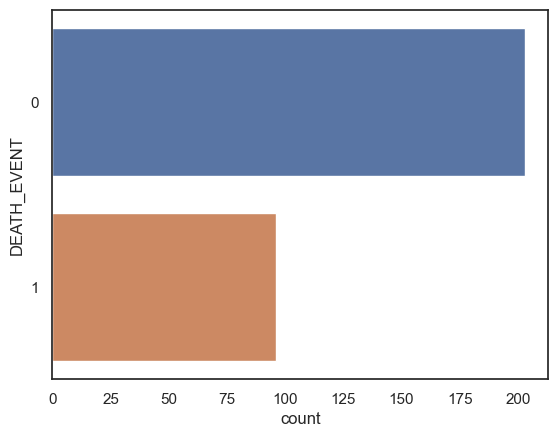

In [18]:
sns.countplot(y = df['DEATH_EVENT'])

<AxesSubplot:xlabel='count', ylabel='diabetes'>

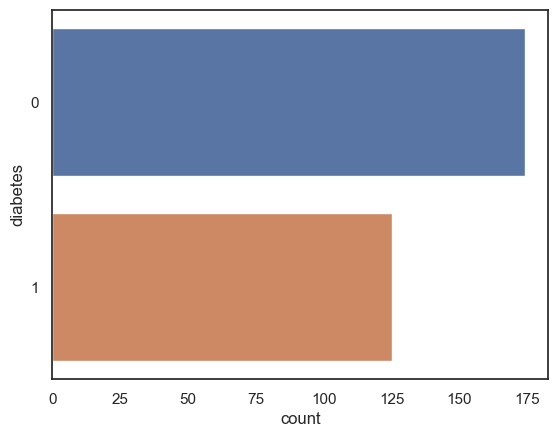

In [19]:
sns.countplot(y = df['diabetes'])

<AxesSubplot:xlabel='count', ylabel='high_blood_pressure'>

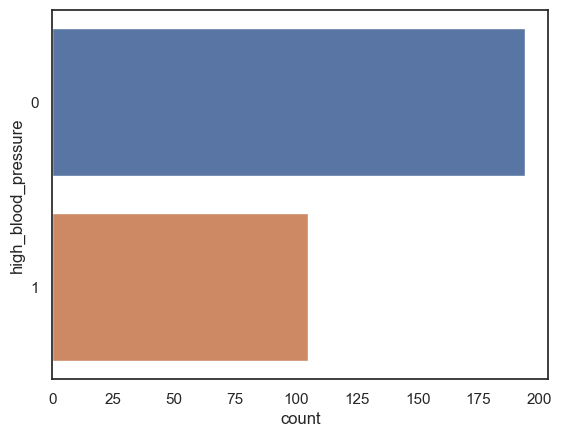

In [20]:
sns.countplot(y= df['high_blood_pressure'])

<AxesSubplot:ylabel='Density'>

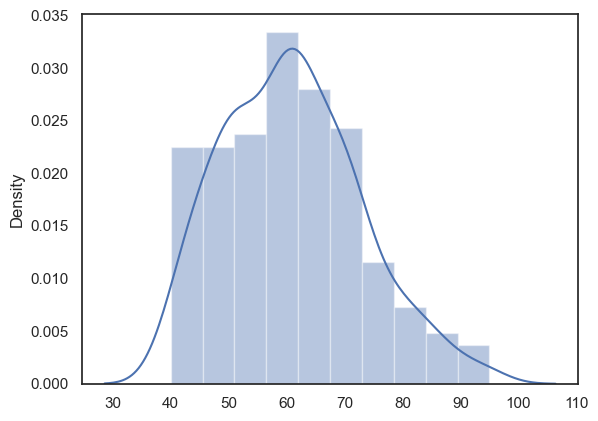

In [21]:
sns.distplot(x = df['age'])

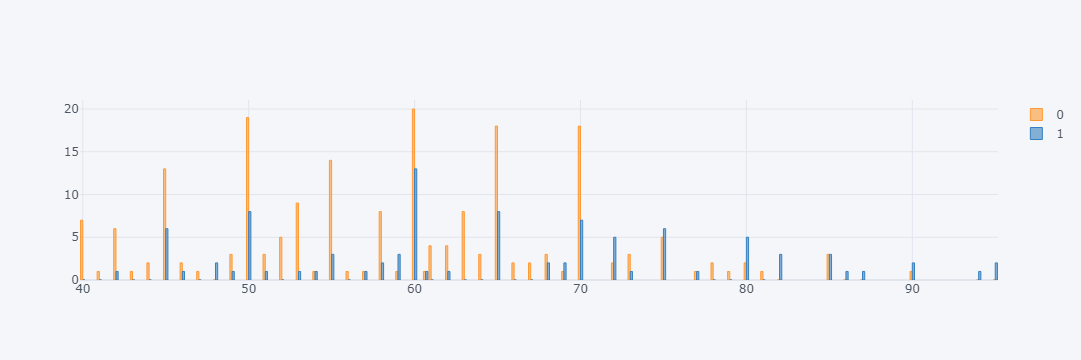

In [22]:
pd.crosstab(df['age'],df['DEATH_EVENT']).iplot(kind='bar')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

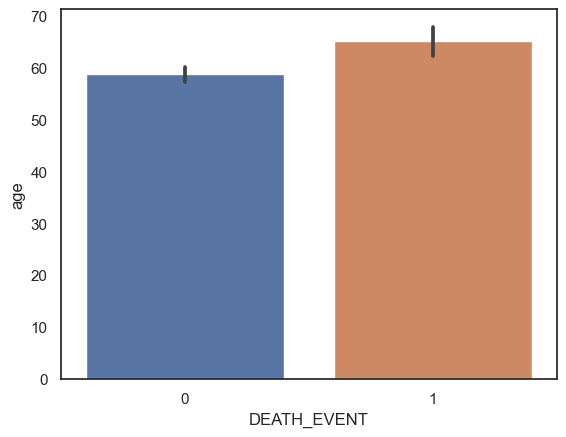

In [23]:
sns.barplot(y=df['age'],x = df['DEATH_EVENT'])

<AxesSubplot:xlabel='count', ylabel='smoking'>

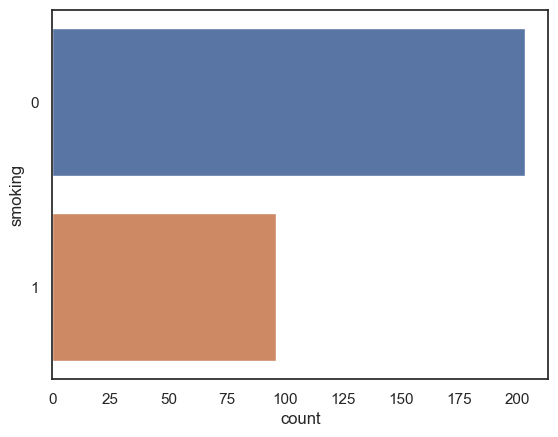

In [24]:
sns.countplot(y=df['smoking'])

<AxesSubplot:ylabel='Density'>

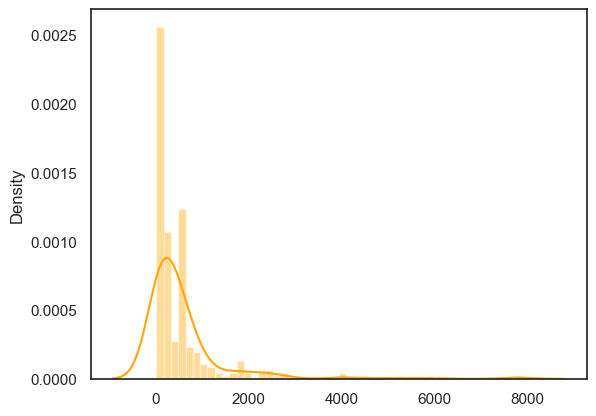

In [25]:
sns.distplot(x = df['creatinine_phosphokinase'],kde=True,color='orange')

<AxesSubplot:ylabel='Density'>

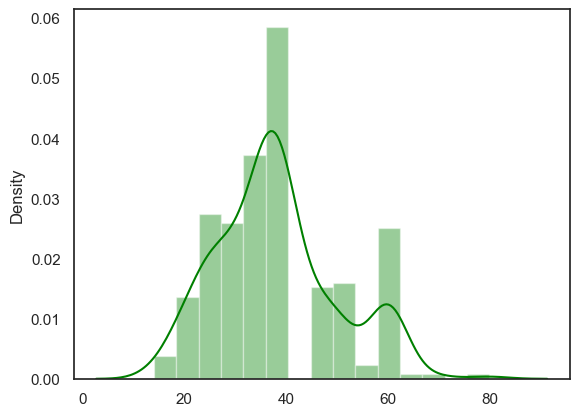

In [26]:
sns.distplot(x = df['ejection_fraction'],color='green')

<AxesSubplot:ylabel='Density'>

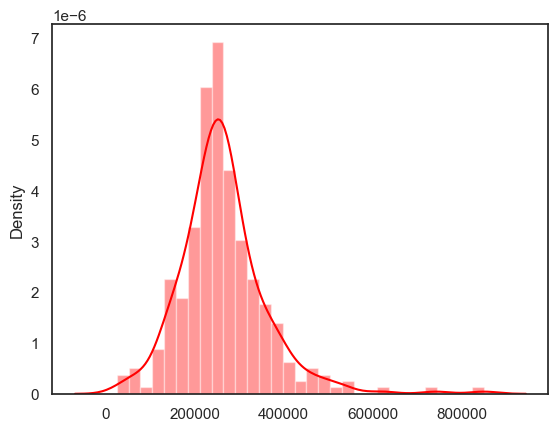

In [27]:
sns.distplot(x=df['platelets'],color='red')

<AxesSubplot:ylabel='Density'>

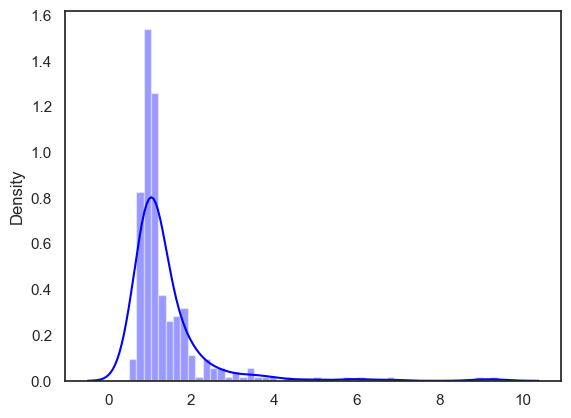

In [28]:
sns.distplot(x = df['serum_creatinine'],color = 'blue')

<AxesSubplot:ylabel='Density'>

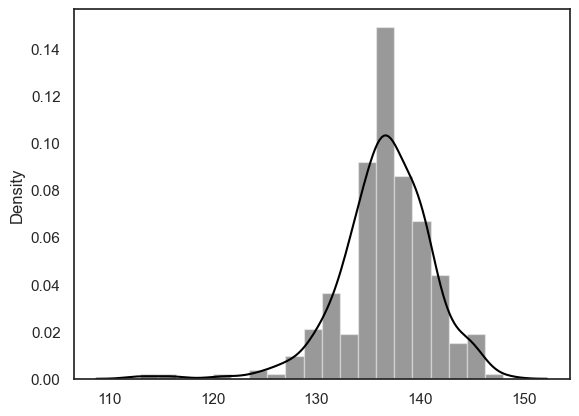

In [29]:
sns.distplot(x = df['serum_sodium'],color = 'black')

<AxesSubplot:ylabel='Density'>

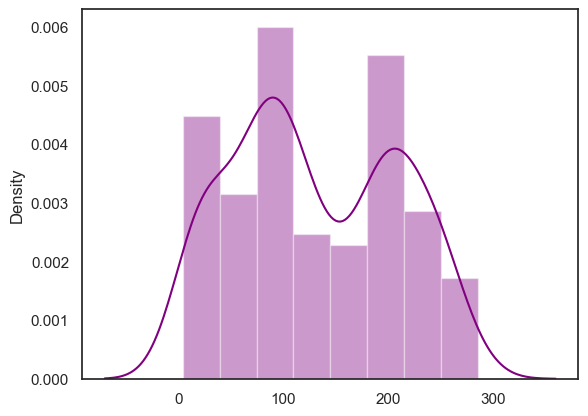

In [30]:
sns.distplot(x = df['time'],color = 'purple')

In [31]:
def stripplot_with_violinplot(x, y,data):
    stripplot_kwargs = dict({'linewidth': 0.2, 'size': 10, 'alpha': 0.5})
    sns.violinplot(x=x, y=y, data=data, color="0.9")
    sns.stripplot(x=x, y=y, data=data, jitter=True, **stripplot_kwargs)
    plt.show()

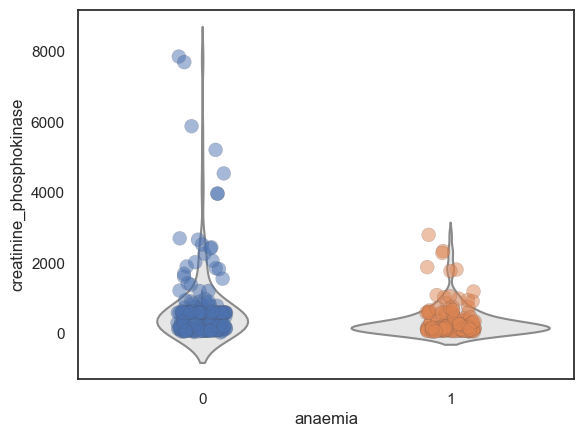

In [32]:
stripplot_with_violinplot(x = df['anaemia'],y = df['creatinine_phosphokinase'],data=df)

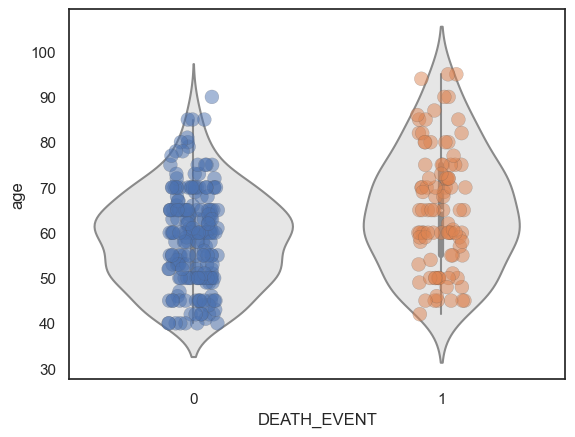

In [33]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['age'],data=df)

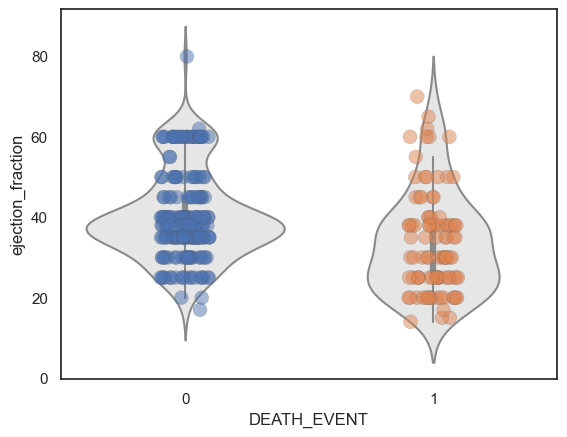

In [34]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['ejection_fraction'],data=df)

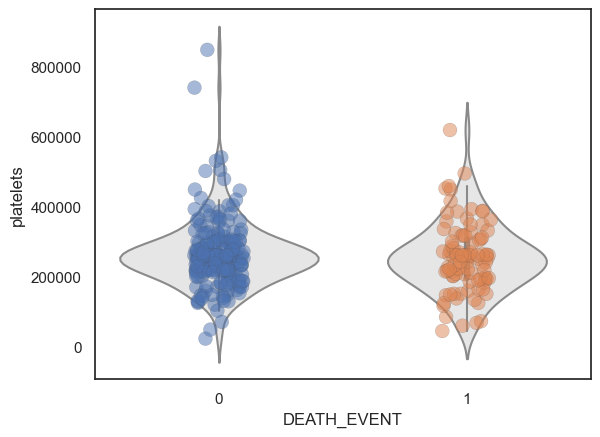

In [35]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['platelets'],data=df)

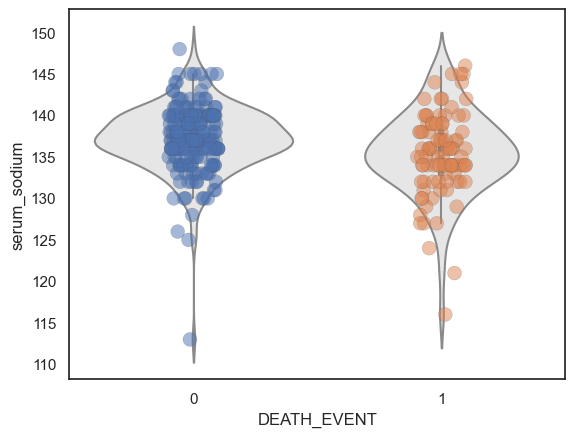

In [36]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['serum_sodium'],data=df)

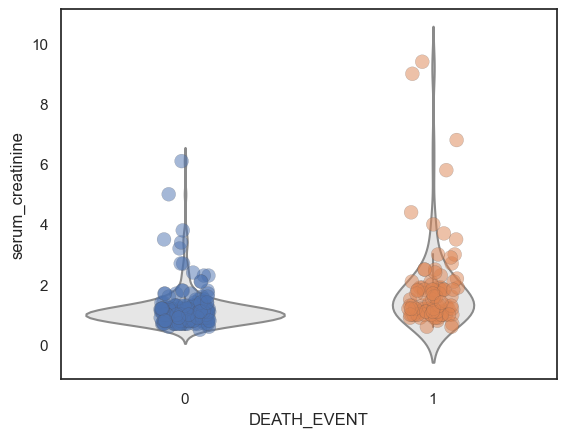

In [37]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['serum_creatinine'],data=df)

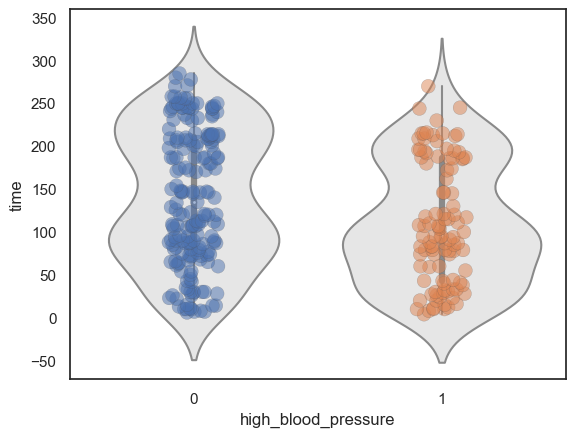

In [38]:
stripplot_with_violinplot(x = df['high_blood_pressure'],y = df['time'],data=df)

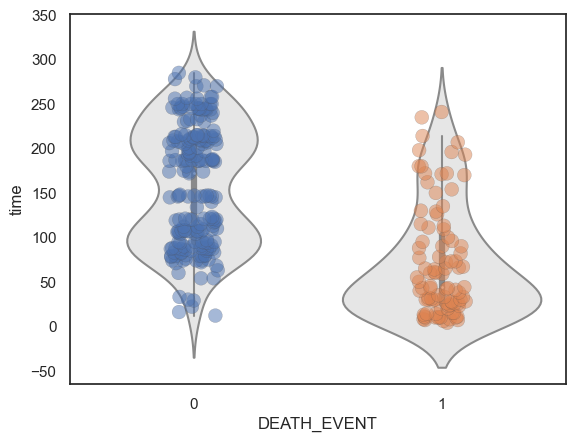

In [39]:
stripplot_with_violinplot(x = df['DEATH_EVENT'],y = df['time'],data=df)

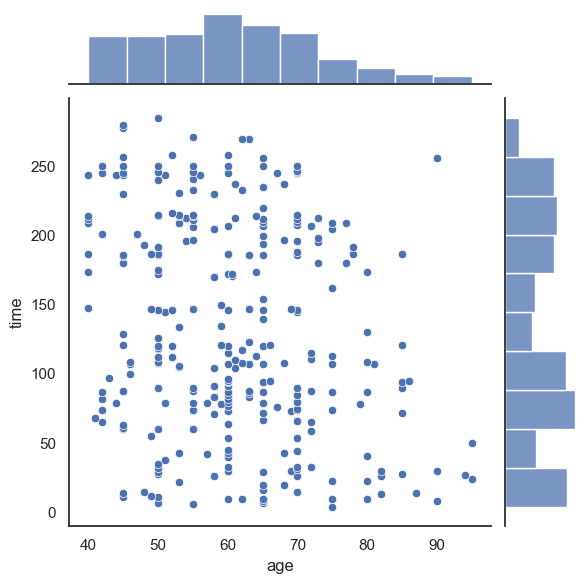

In [40]:
sns.jointplot(data=df,x='age',y='time')

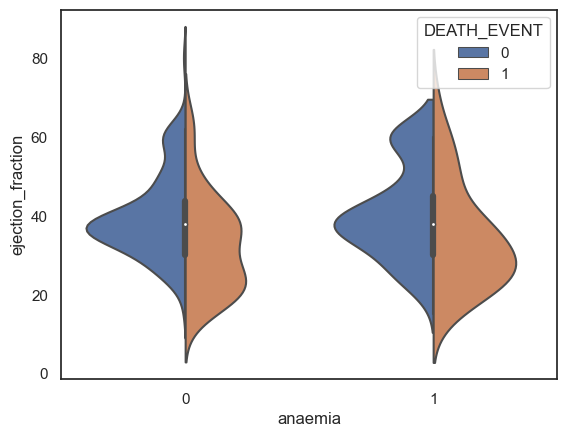

In [41]:
try:
    sns.violinplot(y = 'ejection_fraction',x = 'anaemia',hue = 'DEATH_EVENT',data=df,split=True)
    
except:
    sns.violinplot(y = 'ejection_fraction',x = 'anaemia',hue = 'DEATH_EVENT',data=df,split=True)
    

In [42]:
a = df.columns

In [43]:
list(a)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

## Scaling

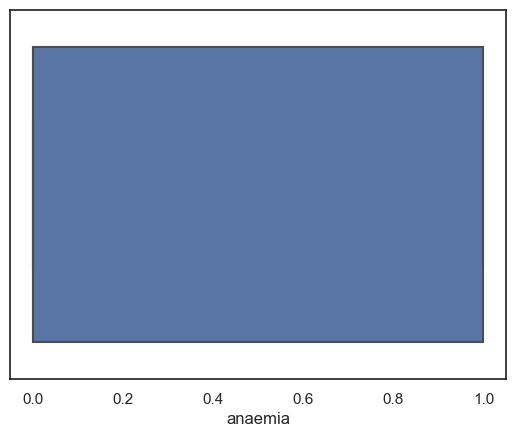

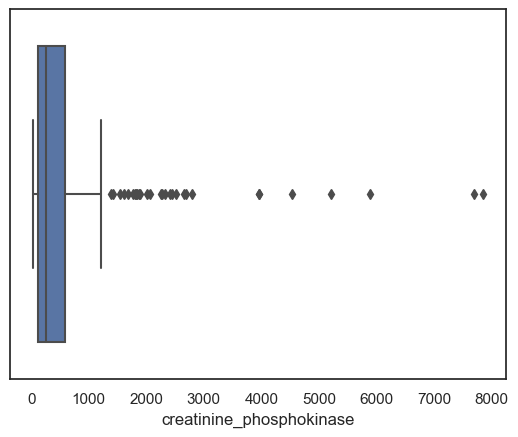

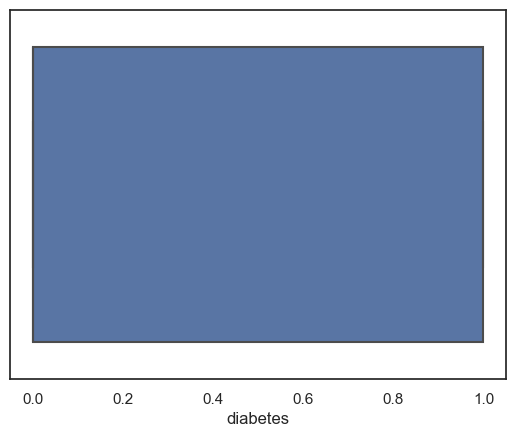

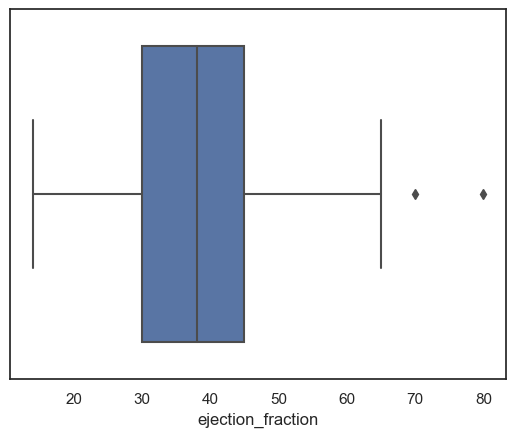

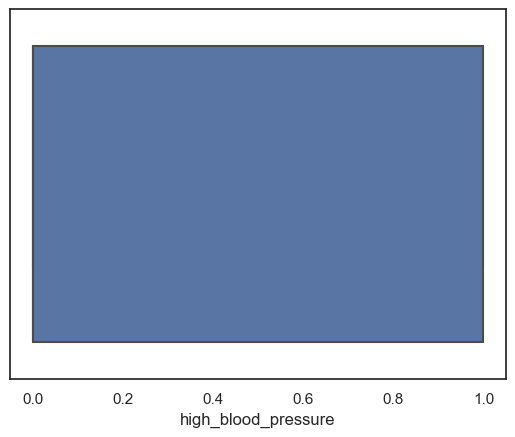

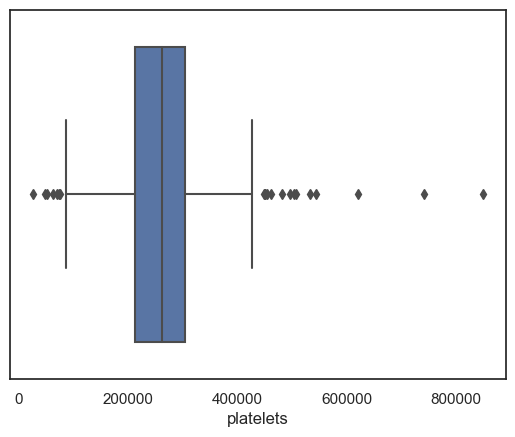

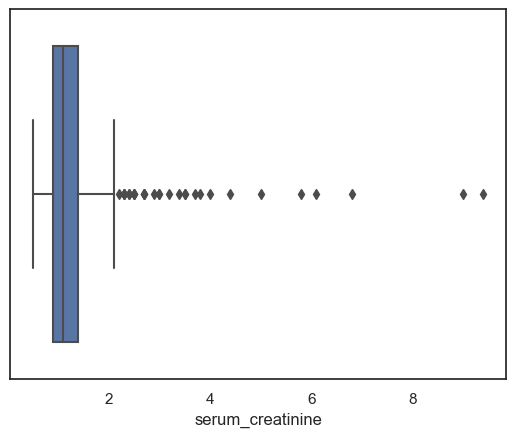

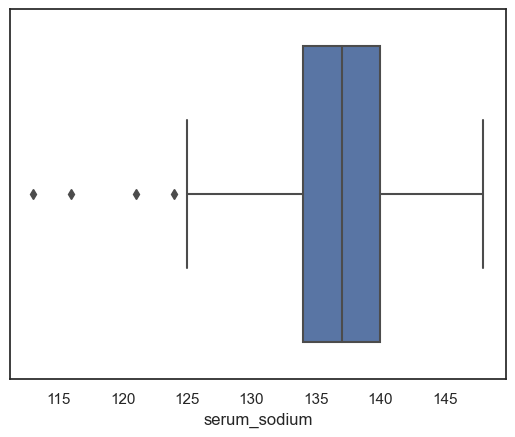

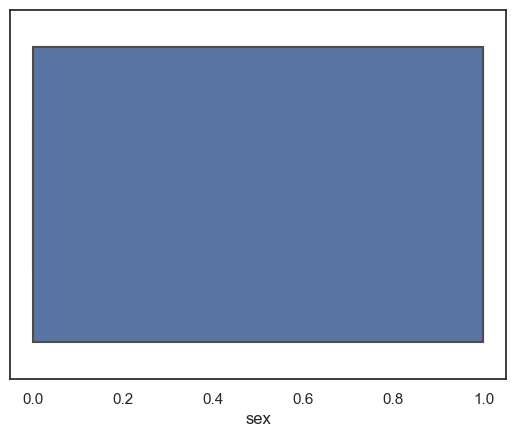

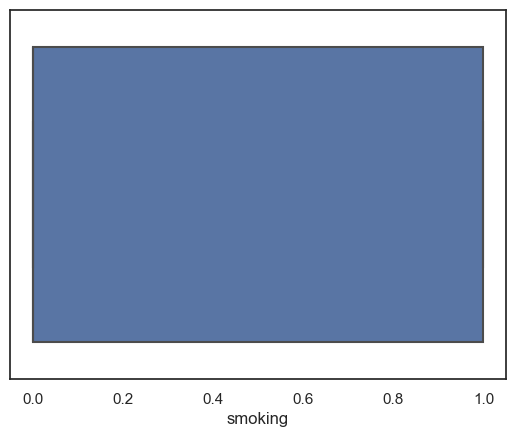

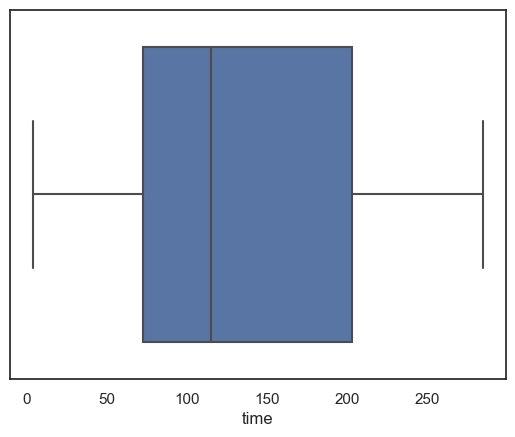

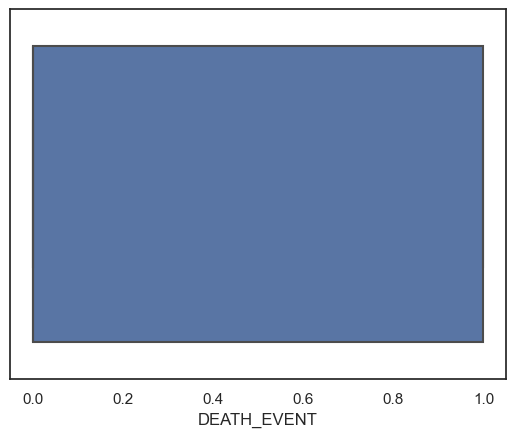

In [44]:
for i in range(1,13):
    sns.boxplot(df.iloc[:,i])
    plt.show()

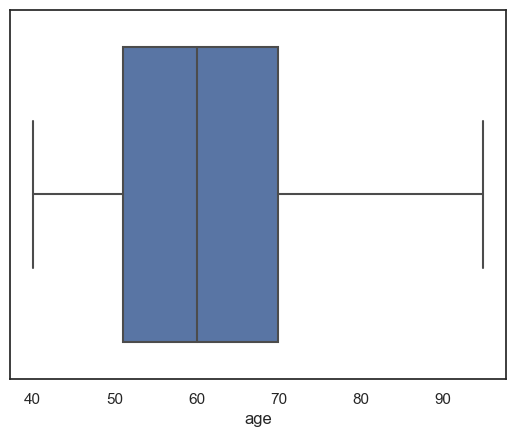

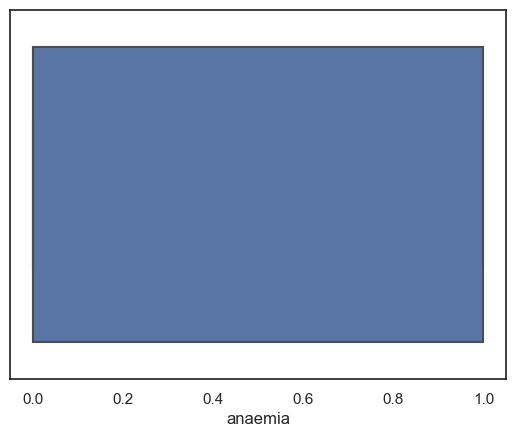

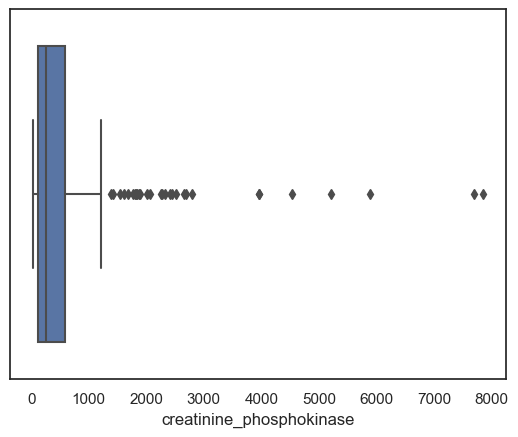

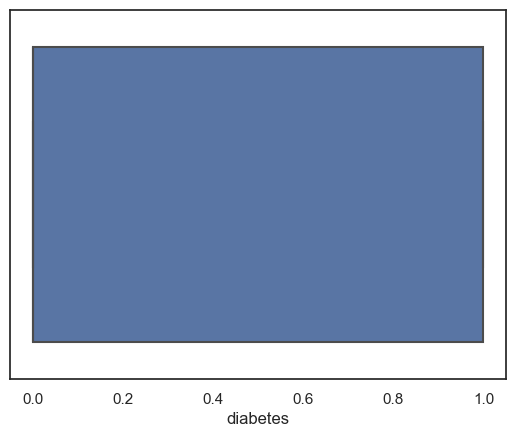

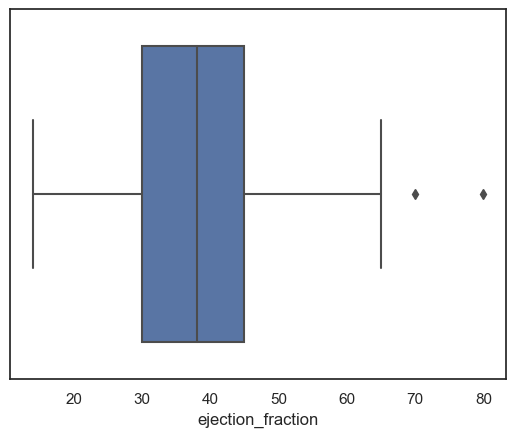

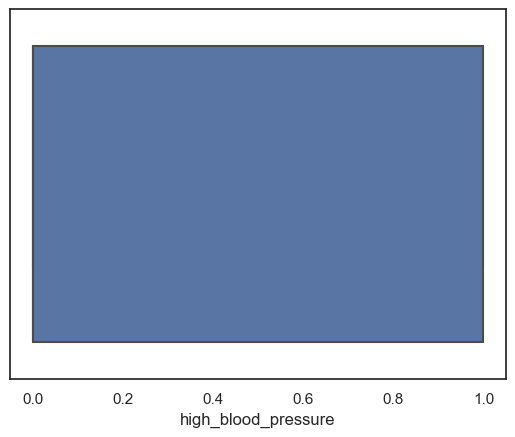

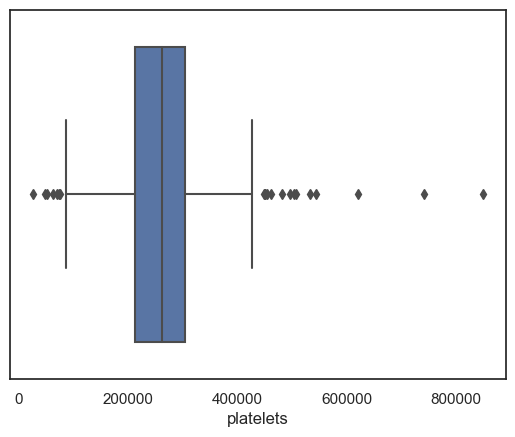

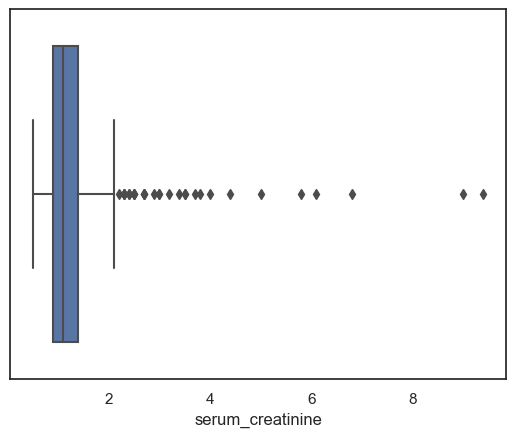

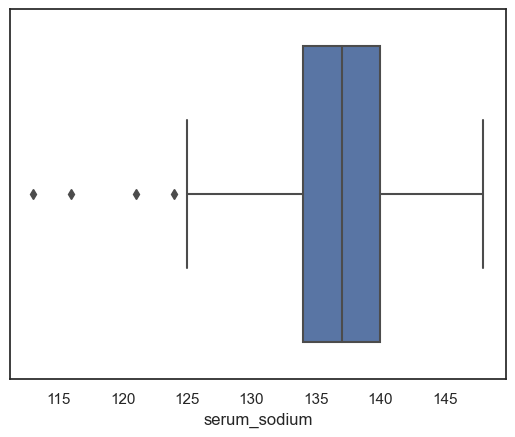

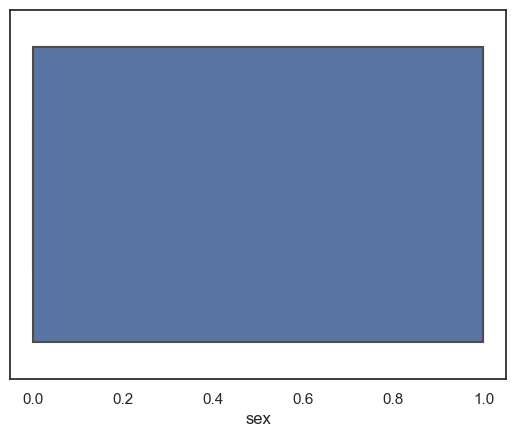

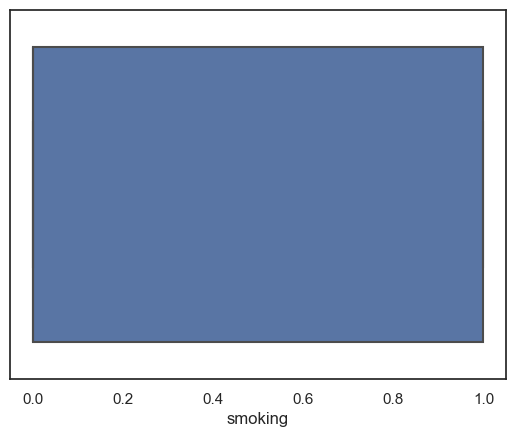

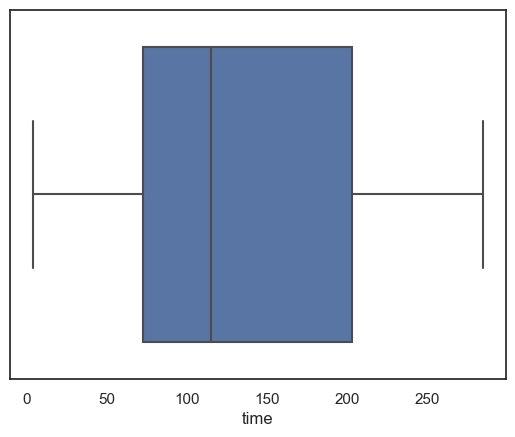

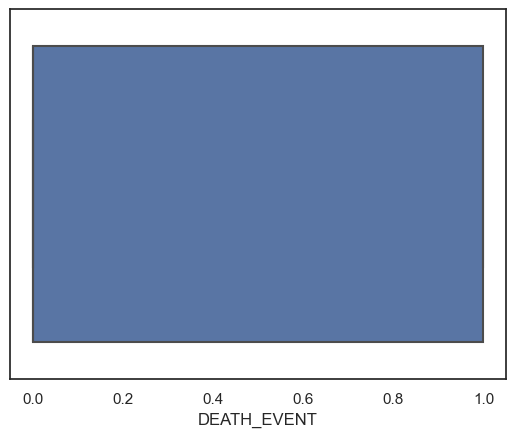

In [45]:
for i in df.columns:
    
    sns.boxplot(data=df,x = df[i])
    
    plt.show()
    

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']


In [48]:
x.values

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [49]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [50]:
x.shape

(299, 12)

In [51]:
y.shape

(299,)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state =0)

In [53]:
x_train.shape

(179, 12)

In [54]:
x_test.shape

(120, 12)

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
x_train

array([[ 1.86325823, -0.89893315, -0.5604832 , ...,  0.71899176,
         1.50151439, -1.2821834 ],
       [-0.74965026, -0.89893315, -0.49002441, ...,  0.71899176,
         1.50151439, -0.1708134 ],
       [ 2.29874298,  1.11242977, -0.47070507, ...,  0.71899176,
        -0.66599428, -1.43725828],
       ...,
       [ 2.12454908,  1.11242977, -0.52411737, ..., -1.39083652,
        -0.66599428, -0.40342572],
       [-0.05287466, -0.89893315,  0.02137   , ...,  0.71899176,
         1.50151439, -1.1012627 ],
       [ 0.81809484,  1.11242977, -0.44570356, ...,  0.71899176,
         1.50151439,  0.26856544]])

## ANN

In [57]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import losses,datasets,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [58]:
model = Sequential()
model.add(Dense(12,input_dim=12,activation = 'relu'))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.25))
#model.add(BatchNormalization())
#model.add(Dense(8,activation = 'relu',kernel_regularizer = tensorflow.keras.regularizers.l2(0.001)))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [60]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [61]:
#adam = Adam(learning_rate=0.01)

In [62]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [63]:
history=model.fit(x_train,y_train,verbose=1,epochs=200,batch_size=32,validation_split=0.2,callbacks = callback,shuffle=False)

Epoch 1/200
5/5 [==============================] - 2s 118ms/step - loss: 0.8809 - accuracy: 0.3706 - val_loss: 0.7855 - val_accuracy: 0.2778
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 0.8600 - accuracy: 0.4406 - val_loss: 0.7720 - val_accuracy: 0.3056
Epoch 3/200
5/5 [==============================] - 0s 16ms/step - loss: 0.8385 - accuracy: 0.4056 - val_loss: 0.7597 - val_accuracy: 0.3056
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 0.8109 - accuracy: 0.3776 - val_loss: 0.7480 - val_accuracy: 0.3056
Epoch 5/200
5/5 [==============================] - 0s 18ms/step - loss: 0.8402 - accuracy: 0.4196 - val_loss: 0.7369 - val_accuracy: 0.3056
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 0.8107 - accuracy: 0.4336 - val_loss: 0.7268 - val_accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 0.7756 - accuracy: 0.4196 - val_loss: 0.7177 - val_accuracy: 0.3889
Epoch 8/200
5/5 [==

In [64]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [65]:
y_pred

array([[0.0827427 ],
       [0.11521887],
       [0.8659417 ],
       [0.0671147 ],
       [0.2604211 ],
       [0.19558313],
       [0.75100905],
       [0.08502386],
       [0.41315198],
       [0.18135501],
       [0.16746327],
       [0.9076053 ],
       [0.13452145],
       [0.12791047],
       [0.52976036],
       [0.7350802 ],
       [0.0275961 ],
       [0.11112552],
       [0.15157849],
       [0.05489245],
       [0.5087595 ],
       [0.6046786 ],
       [0.59193933],
       [0.29033938],
       [0.5792775 ],
       [0.12527221],
       [0.1534327 ],
       [0.03229354],
       [0.02567041],
       [0.07400367],
       [0.12679952],
       [0.7308478 ],
       [0.18120927],
       [0.19420937],
       [0.46993068],
       [0.44742757],
       [0.19058777],
       [0.14067018],
       [0.01609266],
       [0.88950074],
       [0.05396402],
       [0.39322105],
       [0.09458873],
       [0.14661172],
       [0.9453699 ],
       [0.19360465],
       [0.04528072],
       [0.065

In [66]:
y_pred = y_pred.argmax(axis=-1)

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6833333333333333


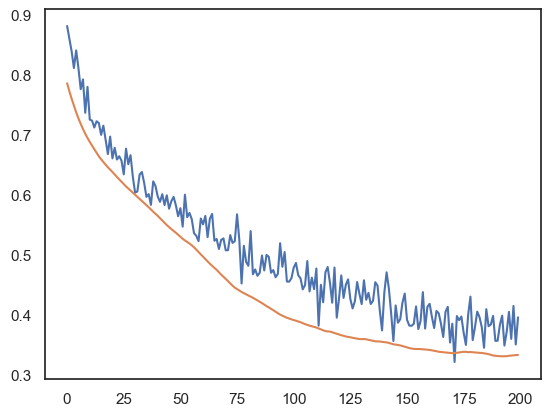

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

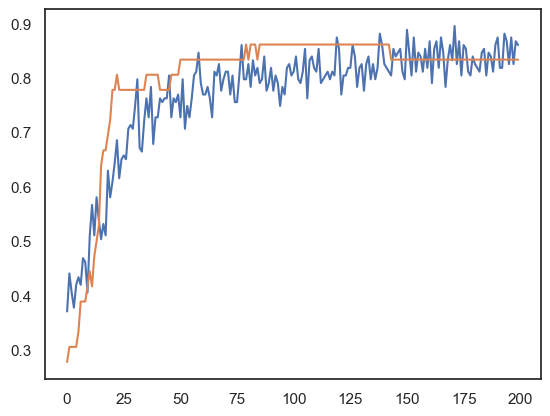

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [71]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[82  0]
 [38  0]]
0.6833333333333333


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        82
           1       0.00      0.00      0.00        38

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120



In [73]:
x_train.shape

(179, 12)

In [74]:
y_train.shape

(179,)

In [75]:
x_test.shape

(120, 12)

## Hyperparameter-tuning in a Neural Network

In [76]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [79]:
X_train.shape

(239, 12)

In [80]:
Y_train.shape

(239,)

In [81]:
X_test.shape

(60, 12)

In [82]:
Y_test.shape

(60,)

In [83]:
X_train.duplicated().sum()

0

In [84]:
X_test.duplicated().sum()

0

In [85]:
X_train.dropna(inplace=True)

In [86]:
X_test.dropna(inplace=True)

In [87]:
Y_train.dropna(inplace=True)

In [88]:
Y_test.dropna(inplace=True)

In [141]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
#X_train=X_train.argmax()

In [143]:
#X_test=X_test.argmax()

In [144]:
import keras_tuner as kt

In [145]:
# to slect appropriate optimizer

def build_model(hp):
    model = Sequential()
    model.add(Dense(32,activation='relu',input_dim=12))
    model.add(Dense(1,activation='sigmoid'))
    optimizer = hp.Choice('optimizer',values=['sgd','adadelta','adam','rmsprop','nadam'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
    

In [152]:
tuner =kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10, overwrite = True)

In [153]:
tuner.search(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [154]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [159]:
model=tuner.get_best_models(num_models=1)[0]

In [161]:
model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.5501 - accuracy: 0.7490 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5333 - accuracy: 0.7657 - val_loss: 0.6274 - val_accuracy: 0.7000
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5176 - accuracy: 0.7741 - val_loss: 0.6179 - val_accuracy: 0.7000
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5032 - accuracy: 0.7908 - val_loss: 0.6088 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4894 - accuracy: 0.7908 - val_loss: 0.6012 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4768 - accuracy: 0.7782 - val_loss: 0.5947 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4651 - accuracy: 0.7824 - val_loss: 0.5873 - val_accuracy: 0.7000
Epoch 8/100
8/8 [=========

In [162]:
# how to select number of a layer

def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation='relu',input_dim=12))
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))
        
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = 'adam',metrics=['accuracy'],loss='binary_crossentropy')
    return model

In [167]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='num_layers',overwrite = True)

In [168]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.7833333611488342
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [169]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7}

In [170]:
model= tuner.get_best_models(num_models=1)[0]

In [171]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 71ms/step - loss: 0.3424 - accuracy: 0.8787 - val_loss: 0.6129 - val_accuracy: 0.7667
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2841 - accuracy: 0.8912 - val_loss: 0.5338 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.2615 - accuracy: 0.8912 - val_loss: 0.8223 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.2236 - accuracy: 0.9121 - val_loss: 0.6882 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1722 - accuracy: 0.9414 - val_loss: 0.6970 - val_accuracy: 0.7833
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1349 - accuracy: 0.9623 - val_loss: 0.7974 - val_accuracy: 0.7333
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 0.1117 - accuracy: 0.9623 - val_loss: 1.0034 - val_accuracy: 0.7000
Epoch 8/100
8/8 [===

In [172]:
# to select no of nodes in layer
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value=8,max_value=128)
    model.add(Dense(units=units,activation='relu',input_dim=12))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [177]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',overwrite = True)

In [178]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.699999988079071

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit


In [179]:
tuner.get_best_hyperparameters()[0].values

{'units': 119}

In [180]:
model = tuner.get_best_models(num_models=1)[0]

In [181]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 56ms/step - loss: 0.4755 - accuracy: 0.8410 - val_loss: 0.5463 - val_accuracy: 0.7333
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4522 - accuracy: 0.8536 - val_loss: 0.5360 - val_accuracy: 0.7333
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4338 - accuracy: 0.8536 - val_loss: 0.5263 - val_accuracy: 0.7333
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4173 - accuracy: 0.8536 - val_loss: 0.5208 - val_accuracy: 0.7333
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4037 - accuracy: 0.8577 - val_loss: 0.5158 - val_accuracy: 0.7333
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3910 - accuracy: 0.8619 - val_loss: 0.5130 - val_accuracy: 0.7333
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3812 - accuracy: 0.8703 - val_loss: 0.5100 - val_accuracy: 0.7333
Epoch 8/100
8/8 [=====

In [182]:
# all in all one model

def model_build(hp):
    model = Sequential()
    counter=0
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),
                            inpt_dim=12))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
        
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values=['adadelta','adam','rmsprop','nadam','sgd']),loss='binary_crossentropy',metrics=['accuracy'])
    return model
            

In [183]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='final')

In [184]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6166666746139526

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 00m 13s
INFO:tensorflow:Oracle triggered exit


In [185]:
tuner.get_best_hyperparameters()[0].values

{'units': 119}

In [186]:
mod =tuner.get_best_models(num_models=1)[0]

In [187]:
history = mod.fit(X_train,Y_train,epochs=300,initial_epoch=5,validation_data=(X_test,Y_test))

Epoch 6/300
8/8 [==============================] - 1s 54ms/step - loss: 0.5157 - accuracy: 0.8159 - val_loss: 0.5507 - val_accuracy: 0.7500
Epoch 7/300
8/8 [==============================] - 0s 14ms/step - loss: 0.4860 - accuracy: 0.8201 - val_loss: 0.5341 - val_accuracy: 0.7500
Epoch 8/300
8/8 [==============================] - 0s 11ms/step - loss: 0.4608 - accuracy: 0.8326 - val_loss: 0.5221 - val_accuracy: 0.7500
Epoch 9/300
8/8 [==============================] - 0s 10ms/step - loss: 0.4401 - accuracy: 0.8410 - val_loss: 0.5115 - val_accuracy: 0.7500
Epoch 10/300
8/8 [==============================] - 0s 10ms/step - loss: 0.4222 - accuracy: 0.8452 - val_loss: 0.5034 - val_accuracy: 0.7500
Epoch 11/300
8/8 [==============================] - 0s 10ms/step - loss: 0.4077 - accuracy: 0.8494 - val_loss: 0.4971 - val_accuracy: 0.7500
Epoch 12/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3948 - accuracy: 0.8577 - val_loss: 0.4901 - val_accuracy: 0.7500
Epoch 13/300
8/8 

In [188]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [189]:
pred = pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])